<h1 align="center">Project Report</h1>
<br>

## 1. What is Music Transcription?

Music transcription is the transformation of a musical signal into either a human-readable, or a machine-readable form. Some trained people could achieve this task, with the help of their education and the human intuition. But it is very challenging to develop an automated transcriber, because we need to teach a machine to . We do not realize it often, but there is great mathematical harmony in music. So if we could figure out the aspects of this mathematics, it would be help us develop new technologies for the analysis and synthesis of music.

## 2. Main Attributes of Sound Events

In order to work on a sound event, there are four main qualities which need to be analyzed. These are namely the sound event's *pitch*, *loudness*, *duration* and *timbre* [1]. Here are some brief explanations of these four attributes.

1. **Pitch** refers to the perception of highness or lowness of the sound. In physical terms, this corresponds to the _fundamental frequency_ in the signal. Usually integer multiples of the fundamental frequency ($f_0$) could also be observed, which together form the harmonics of $f_0$.<br>In Western music, going an octave up means doubling the frequency. And this octave is logarithmically divided into 12 notes. Which means that the k<sup>th</sup> note after $f_0$ has the frequency $f_k = f_0\times2^{k/12}$.<br><br>

2. **Loudness** is the perception of the level of sound pressure in the ear [2]. This attribute depends on how quite or loud the signal is.<br><br>

3. The interval between the onset and the offset of a sound event is called the **duration**.<br><br>

4. **Timbre** of the sound depends on the source. For instance knocking on a door or playing the guitar creates different colors of sound. And although two sources could create sound signals with the same pitch, loudness and duration, they might be easily distinguished by their timbres.

Relating to these attributes of sounds, there are particular problems in music transcription. For example: beat tracking, pitch detection etc.

In [10]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy import signal
from scipy.io import wavfile
import numpy as np
import math

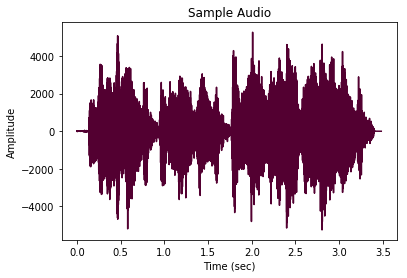

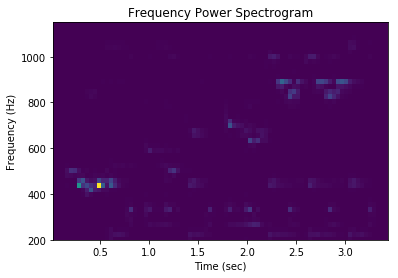

In [11]:
# Reading the .wav file
sample_rate, stereo = wavfile.read('source/alla_turca.wav')
mono = stereo.mean(axis=1)

# Plotting a sample section (Amplitude/Time)
x = np.array([i/sample_rate for i in range(mono.size)])
plt.plot(x, mono, color='#530031')
plt.ylabel("Amplitude")
plt.xlabel("Time (sec)")
plt.title("Sample Audio")
plt.show()

# Plotting the spectrogram from the mono sound signal
frequencies, times, spectogram = signal.spectrogram(mono, sample_rate, nperseg=2048, scaling='spectrum')
plt.pcolormesh(times, frequencies, spectogram)
plt.title("Frequency Power Spectrogram")
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.ylim((200,1150))
plt.show()

In [12]:
Audio("source/alla_turca.wav")

Let's analyze a musical excerpt from Mozart's *Rondo alla Turca*. Above, we see the sound intensity (loudness) versus time representation of a 3.5 seconds excerpt from Mozart. The note onsets are clearly visible as sharp spikes. But the peaks in the graph are indistinguishable in terms of their pitch values.

After this, the musical excerpt is analyzed over a spectrogram. The sound signal is divided into different frequency values in every time frame. As the frequency gets higher, we hear higher tones. Per time frame and frequency value, the power output of the signal is represented by a color, ranging from purple to yellow in this case. We could observe the main melody between the frequencies 400-1000 Hz, and the chords between 200-400 Hz.

## 3. Recent Research

### 3.1 Onsets and Frames: Dual Objective Piano Transcription

This is a newly released research by Google's *Magenta* team. Magenta focuses on machine learning methods for analyzing and synthesizing music. In this paper, they try to address the problem of polyphonic transcription for piano music using deep neural networks. They use *CNNs* (Convolutional Neural Networks) and *LSTM*s (Long Short Term Memory networks) during this process [4].

They utilize the MAPS dataset, which contains piano pieces both software synthesized and real time recorded. The synthesized pieces are used in training, whereas piano recordings form the test set. The onsets and frames model was trained using TensorFlow on the dataset.

Magenta divides the piano transcription problem into two: onset detection and framewise detection. The framewise detector is allowed to accept a note only if the onset for that pitch has been detected. Notes are more easily identifiable at the beginning, so onset detection is crucial in this model. The team actually experimented with removing the onset detection, but it turned out to be a bad idea. The onset and frame detectors first run a convolutional layer. This is followed by bidirectional LSTMs and fully connected sigmoid layers for both. At the same time, onset predictions are fed into the frame detection process as input.


### 3.2 Crepe: A Convolutional Representation for Pitch Estimation

CREPE is a data-driven pitch tracking algorithm for monophonic sound signals, producing state-of-the-art results. It stands for "Convolutional Representation for Pitch Estimation". CREPE works directly on time-domain and is based on a deep convolutional neural network [6].

The architecture composes of six convolutional layers with inputs of 1024-sample excerpts with a 16 kHz sampling rate. The output of the convolutional layers passes through a sigmoid activation layer, and the result is a 360-dimensional vector $\hat{y}$. The 360 nodes of this vector represents 360 pitch values. The vector covers six octaves with 20 cent intervals. (100 cents equal to one semitone and 1200 cents equal to an octave) Each value in the vector shows the likelihood of the corresponding pitch value.

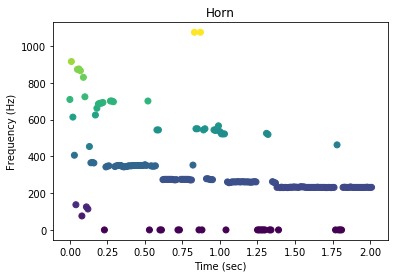

In [13]:
n = []
y = []
s1 = 0
s2 = 0

# Reading frequency values from the CREPE output
with open('source/tch.f0.tsv') as f:
    for line in f:
        l = [elt.strip() for elt in line.split('\t')]
        s2 += 1
        y.append(float(l[1]))
with open('source/black.f0.tsv') as f:
    for line in f:
        l = [elt.strip() for elt in line.split('\t')]
        s1 += 1
        n.append(float(l[1]))
        
x = np.array([i/100 for i in range(s2)])
m = np.array([i/100 for i in range(s1)])

plt.scatter(x, y, c=y)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Horn')
plt.show()

In [14]:
Audio("source/tch.wav")

Above, there is a pitch analysis result of CREPE for an excerpt from Tchaikovsky's *Piano Concerto No. 1* which is played by a horn here. The four notes could be clearly observed as four lines in the graph. They correspond to the frequencies 350, 275, 261 and 231 Hz, slowly descending in pitch. Due of the timbre of the sound and the quality of the recording, we also see other frequency values in the graph. Some of them values are nearly integer multiples of the fundamental frequencies. So these frequencies could as well be analyzed as part of the musical signal, instead of being treated as noise.

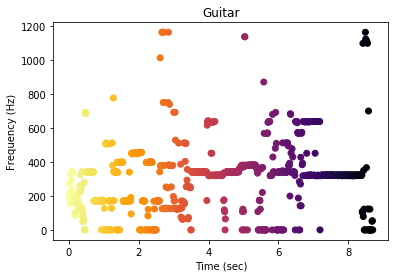

In [15]:
plt.scatter(m, n, c=-m, cmap='inferno')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Guitar')
plt.show()

In [16]:
Audio("source/black.wav")

And this is the CREPE pitch detection result for the beginning of the song *Paint it Black*, a guitar recording. We see that there are many frequencies apart from the main melody, although the sample music is mostly monophonic.

## 4. References

1. Klapuri, Anssi, and Manuel Davy. Signal Processing Methods for Music Transcription. Springer, 2006.
2. “Sound.” Wikiwand, www.wikiwand.com/en/Sound#/Sound_wave_properties_and_characteristics.
3. Goodfellow, Ian, et al. Deep Learning. MIT Press, 2016.
4. Hawthorne, et al. Onsets and Frames: Dual-Objective Piano Transcription. 30 Oct. 2017, arxiv.org/abs/1710.11153.
5. Olah, Christopher. “Understanding LSTM Networks.” Colah's Blog, 27 Aug. 2015, colah.github.io/posts/2015-08-Understanding-LSTMs/.
6. Kim, Jong Wook, et al. Crepe: A Convolutional Representation for Pitch Estimation. New York University, Feb. 2018.